<a href="https://colab.research.google.com/github/suubuuuu/python-/blob/main/kmeansclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

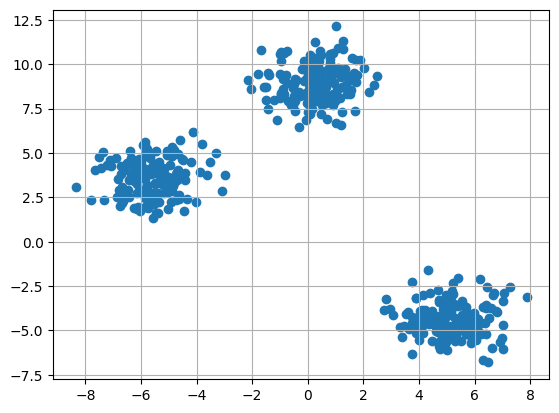

In [5]:
x,y = make_blobs(n_samples = 500,n_features = 2,centers=3,random_state = 23)
fig = plt.figure(0)
plt.grid(True)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [9]:
#initialize the random centroids

k=3
clusters = {}
np.random.seed(33)

for idx in range(k):
  center = 2*(2*np.random.random((x.shape[1],))-1)
  points = []
  cluster = {
      'center':center,
      'points':[]
  }
  clusters[idx] = cluster

clusters

{0: {'center': array([-1.00595949, -0.20009832]), 'points': []},
 1: {'center': array([-0.35623679, -0.95880124]), 'points': []},
 2: {'center': array([ 1.48158275, -1.25984029]), 'points': []}}

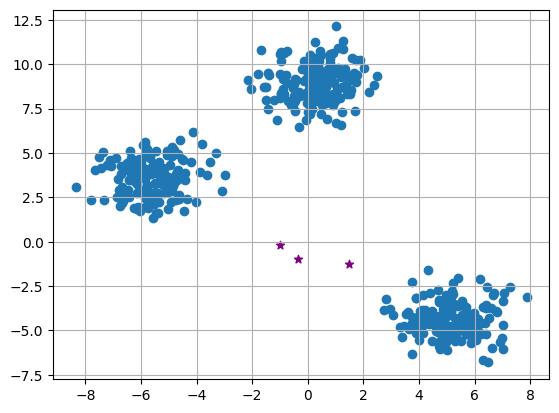

In [10]:
#plot the random initialize ce ter with data points

plt.scatter(x[:,0],x[:,1])
plt.grid(True)
for i in clusters:
  center = clusters[i]['center']
  plt.scatter(center[0],center[1],marker = '*',c = 'purple')
plt.show()

In [11]:
def distance(p1,p2):
  return np.sqrt(np.sum(p1-p2)**2)

In [12]:
def assign_clusters(x,clusters):
    for idx in range(x.shape[0]):
        dist = []

        curr_x = x[idx]

        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters
def update_clusters(x,clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0]>0:
          new_center = points.mean(axis = 0)
          clusters[i]['center'] = new_center
          clusters[i]['points']=[]
        return clusters

In [19]:
def pred_cluster(x,clusters):
  pred = []
  for i in range(x.shape[0]):
    dist = []
    for j in range(k):
        dist.append(distance(x[i],clusters[j]['center']))
    pred.append(np.argmin(dist))
  return pred

In [20]:
#step:8 Assign,update and predict the clusters center

clusters = assign_clusters(x,clusters)
clusters = update_clusters(x,clusters)
pred = pred_cluster(x,clusters)


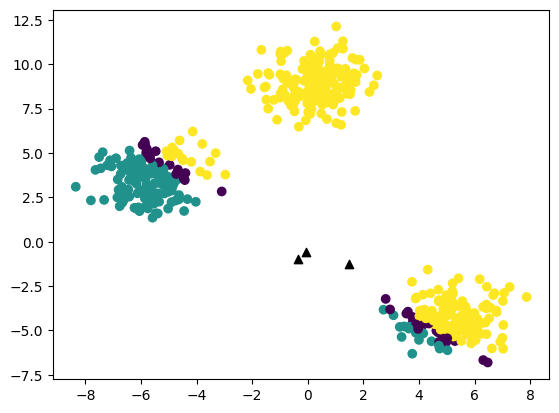

In [22]:
#step:9 Plot the data points with their predicted cluster center

plt.scatter(x[:,0],x[:,1],c=pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'black')
plt.show()